In [1]:
import os
import os.path as osp
from PIL import Image
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def imshow_pair(im1, im2):
    f, ax = plt.subplots(1, 2, figsize=(12,6))
    np_im1 = np.asarray(im1)
    np_im2 = np.asarray(im2)
    if len(np_im1.shape) == 2:
        ax[0].imshow(np_im1, cmap='gray'),  ax[0].axis('off')
    else:
        ax[0].imshow(np_im1),  ax[0].axis('off')
    if len(np_im2.shape) == 2:
        ax[1].imshow(np.asarray(np_im2), cmap = 'gray'), ax[1].axis('off')
    else:
        ax[1].imshow(np.asarray(np_im2)), ax[1].axis('off')
    plt.tight_layout()

In [189]:
path_ims = 'images/'
path_masks = 'masks'

im_list =sorted( os.listdir(path_ims))
num_ims = len(im_list)
full_im_list = [osp.join(path_ims, im_list[i]) for i in range(num_ims)]

In [190]:
full_im_list

['images/Image_01L.jpg',
 'images/Image_01R.jpg',
 'images/Image_02L.jpg',
 'images/Image_02R.jpg',
 'images/Image_03L.jpg',
 'images/Image_03R.jpg',
 'images/Image_04L.jpg',
 'images/Image_04R.jpg',
 'images/Image_05L.jpg',
 'images/Image_05R.jpg',
 'images/Image_06L.jpg',
 'images/Image_06R.jpg',
 'images/Image_07L.jpg',
 'images/Image_07R.jpg',
 'images/Image_08L.jpg',
 'images/Image_08R.jpg',
 'images/Image_09L.jpg',
 'images/Image_09R.jpg',
 'images/Image_10L.jpg',
 'images/Image_10R.jpg',
 'images/Image_11L.jpg',
 'images/Image_11R.jpg',
 'images/Image_12L.jpg',
 'images/Image_12R.jpg',
 'images/Image_13L.jpg',
 'images/Image_13R.jpg',
 'images/Image_14L.jpg',
 'images/Image_14R.jpg']

In [176]:
from skimage.filters import threshold_li
from skimage.morphology import convex_hull_image
from image_preprocessing import correct_illumination

In [109]:
def getLargestCC(segmentation):
    labels = label(segmentation)
    largestCC = labels == np.argmax(np.bincount(labels.flat, weights=segmentation.flat))
    return largestCC

In [177]:
def crop_FOV(im):
    im = correct_illumination(np.array(im))[:,:,1]
    t = threshold_li(im)
    binary = im>t
    binary = getLargestCC(binary)
    return convex_hull_image(binary)

1


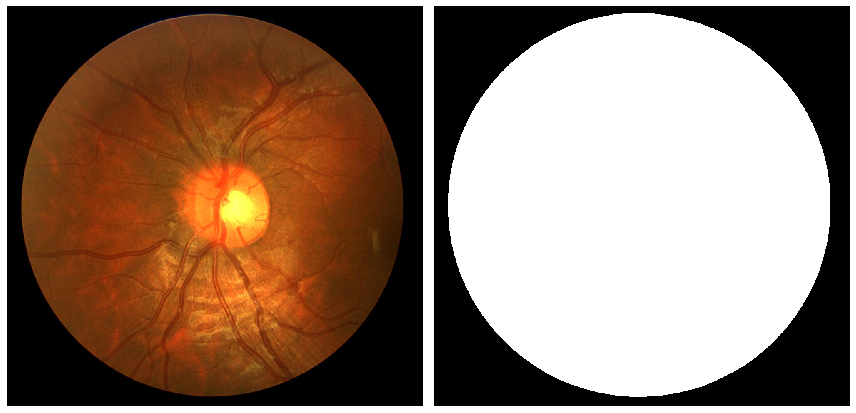

In [192]:
for i in range(len(im_list)):
    n = im_list[i]
    full_n = full_im_list[i]
    out_n = osp.join(path_masks, n)
    im = Image.open(full_n)
    fov = Image.fromarray(crop_FOV(im).astype(bool))
    fov.save(out_n)
    imshow_pair(im, fov)
    plt.show()

In [212]:
from skimage import draw
from scipy import optimize

def cost(params):
    x0, y0, r = params
    coords = draw.circle(y0, x0, r, shape=image.shape)
    template = np.zeros_like(image)
    template[coords] = 1
    return -np.sum(template == image)

def fit_circle(bubble):
    y0, x0 = bubble.centroid
    r = bubble.major_axis_length / 2.

    x0, y0, r = optimize.fmin(cost, (x0, y0, r))
    return (x0,y0), r

In [213]:
def create_circular_mask(h, w, center, radius):
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [221]:
def crop_FOV(im):
    im = correct_illumination(np.array(im))[:,:,1]
    t = threshold_li(im)
    binary = im>t
    binary = getLargestCC(binary)
    regions = regionprops(binary.astype(int))
    bubble = regions[0]
    (x0,y0), r = fit_circle(bubble)
    return create_circular_mask(im.shape[0], im.shape[1], (x0,y0), r)

Optimization terminated successfully.
         Current function value: -957959.000000
         Iterations: 65
         Function evaluations: 136


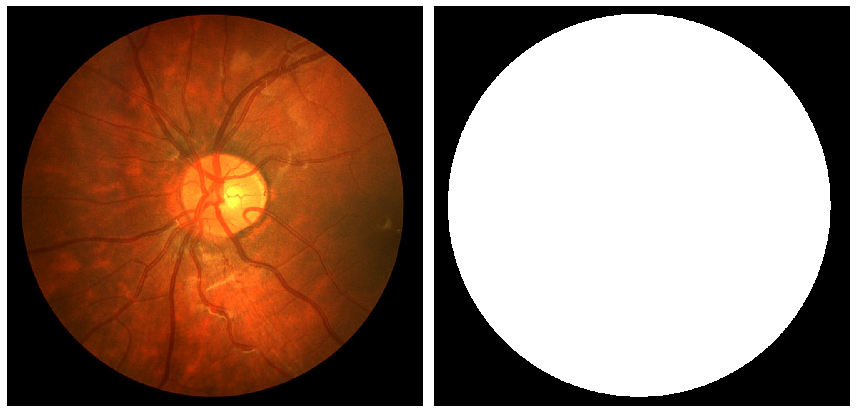

Optimization terminated successfully.
         Current function value: -957958.000000
         Iterations: 67
         Function evaluations: 141


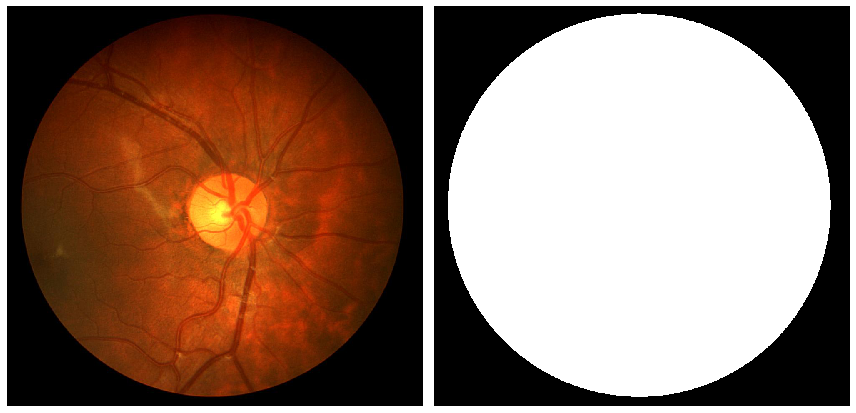

Optimization terminated successfully.
         Current function value: -957960.000000
         Iterations: 57
         Function evaluations: 126


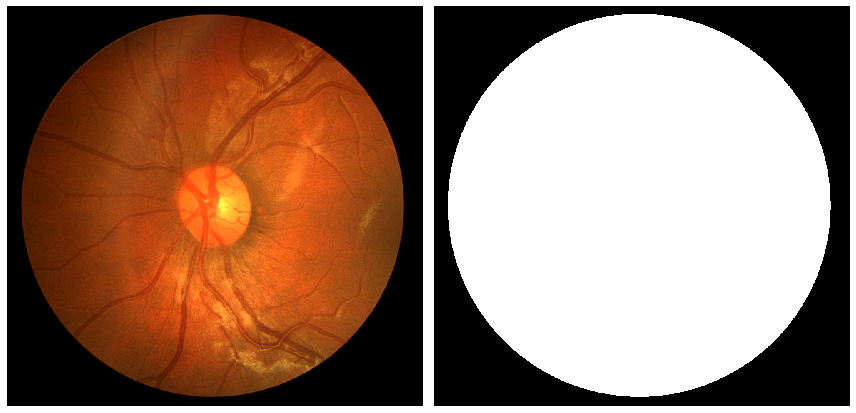

Optimization terminated successfully.
         Current function value: -957959.000000
         Iterations: 54
         Function evaluations: 121


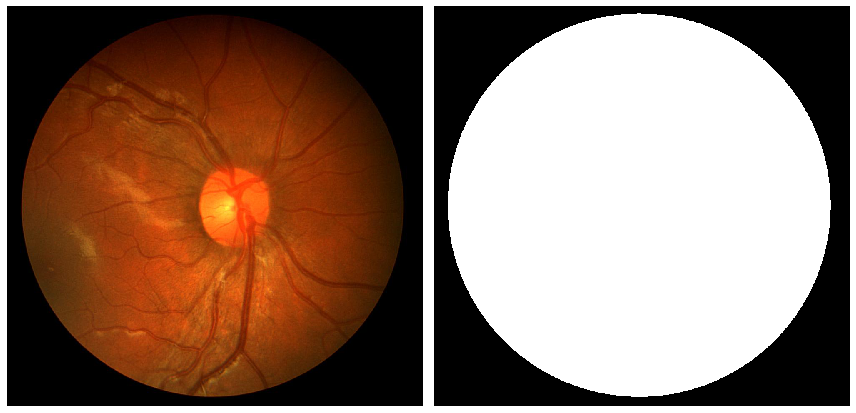

Optimization terminated successfully.
         Current function value: -957950.000000
         Iterations: 54
         Function evaluations: 127


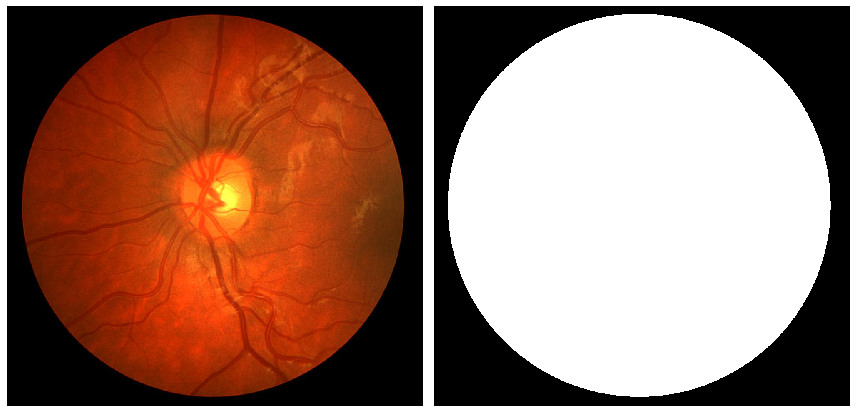

Optimization terminated successfully.
         Current function value: -957958.000000
         Iterations: 58
         Function evaluations: 129


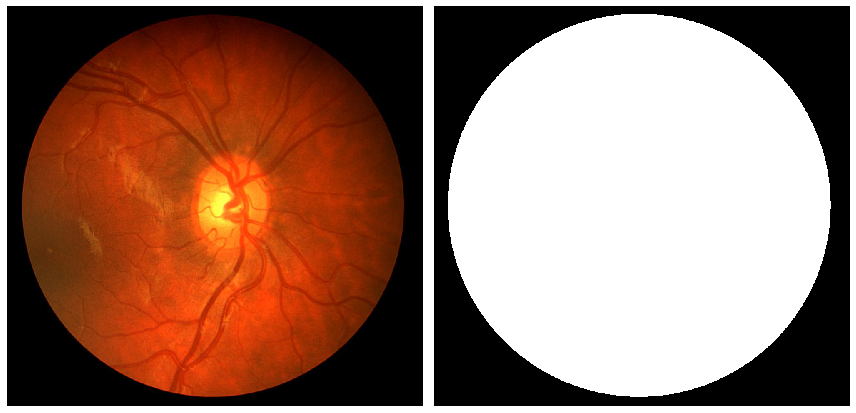

Optimization terminated successfully.
         Current function value: -957959.000000
         Iterations: 70
         Function evaluations: 144


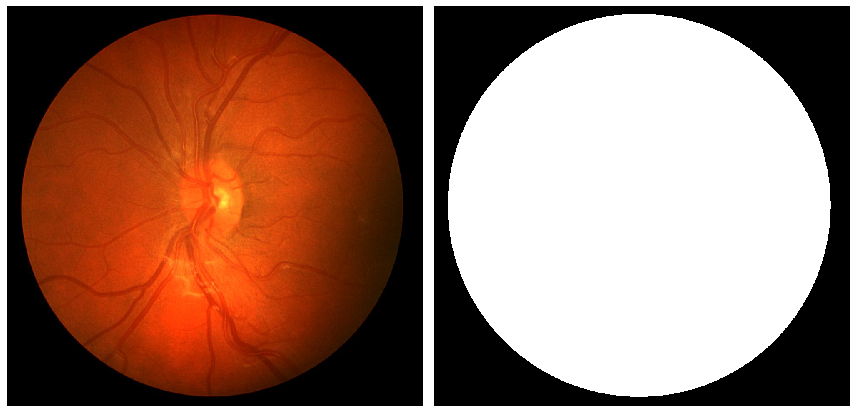

Optimization terminated successfully.
         Current function value: -957958.000000
         Iterations: 57
         Function evaluations: 126


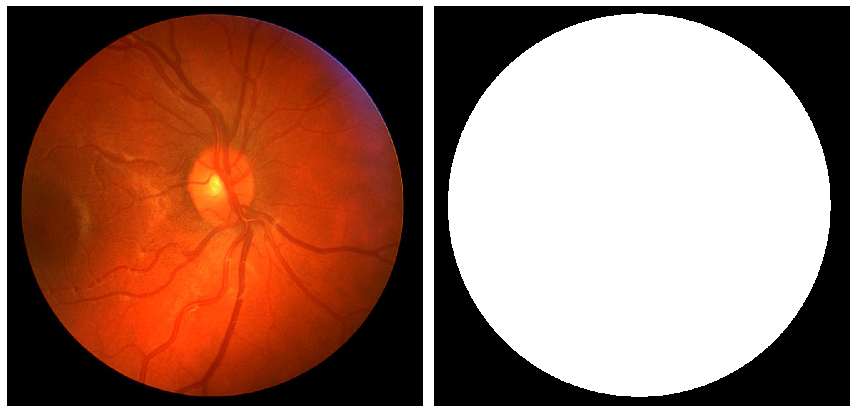

Optimization terminated successfully.
         Current function value: -957957.000000
         Iterations: 62
         Function evaluations: 131


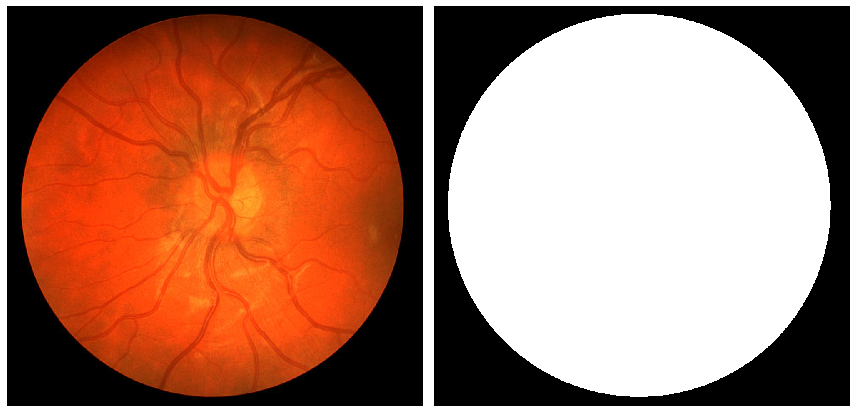

Optimization terminated successfully.
         Current function value: -957960.000000
         Iterations: 63
         Function evaluations: 129


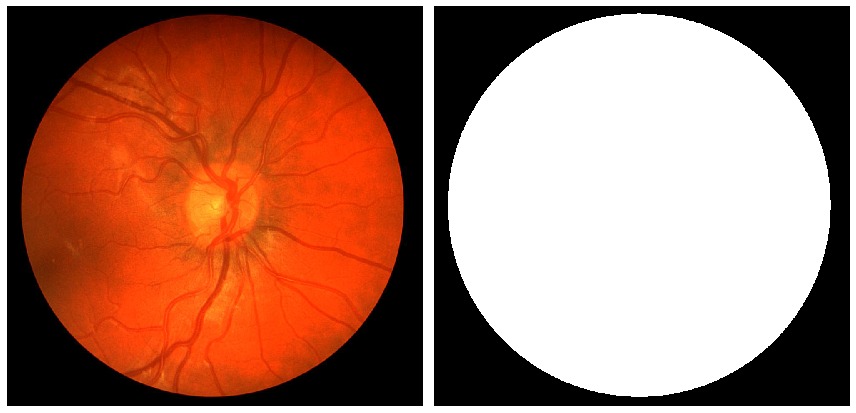

Optimization terminated successfully.
         Current function value: -957958.000000
         Iterations: 57
         Function evaluations: 129


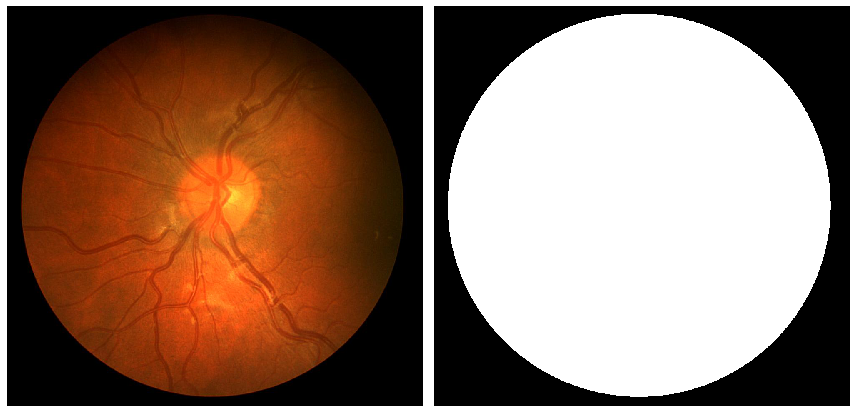

Optimization terminated successfully.
         Current function value: -957957.000000
         Iterations: 61
         Function evaluations: 130


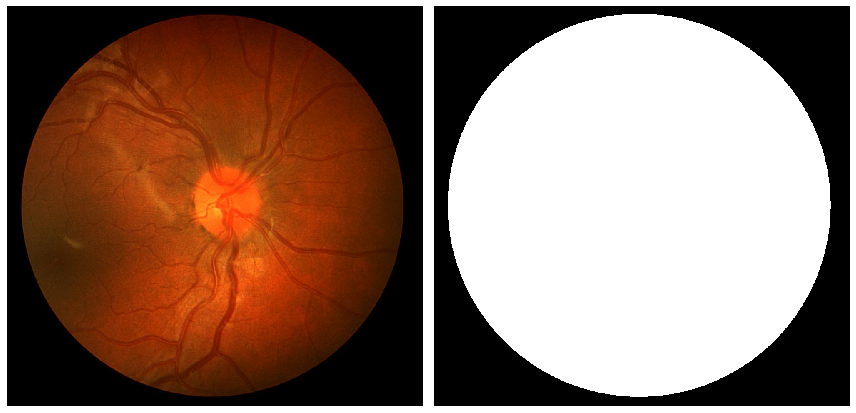

Optimization terminated successfully.
         Current function value: -957957.000000
         Iterations: 64
         Function evaluations: 137


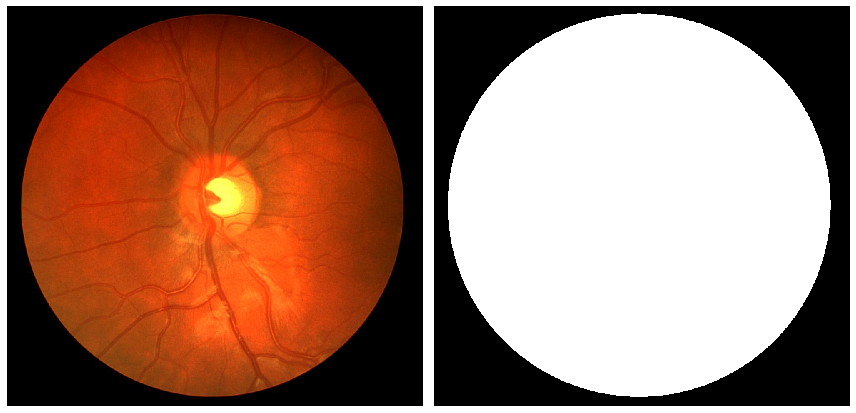

Optimization terminated successfully.
         Current function value: -957960.000000
         Iterations: 63
         Function evaluations: 133


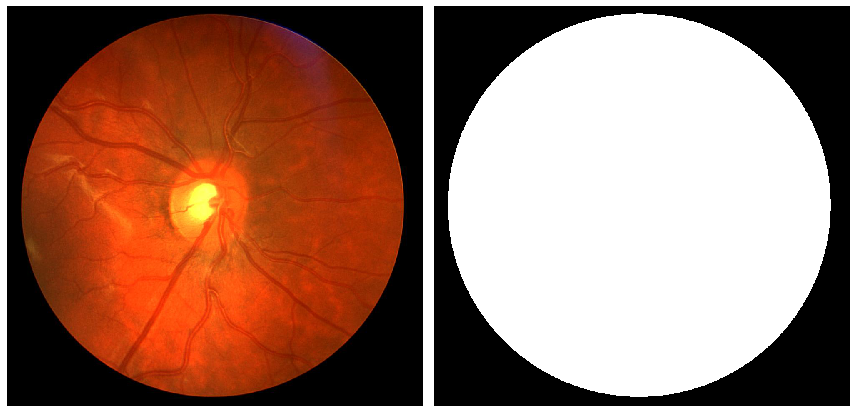

Optimization terminated successfully.
         Current function value: -957959.000000
         Iterations: 57
         Function evaluations: 129


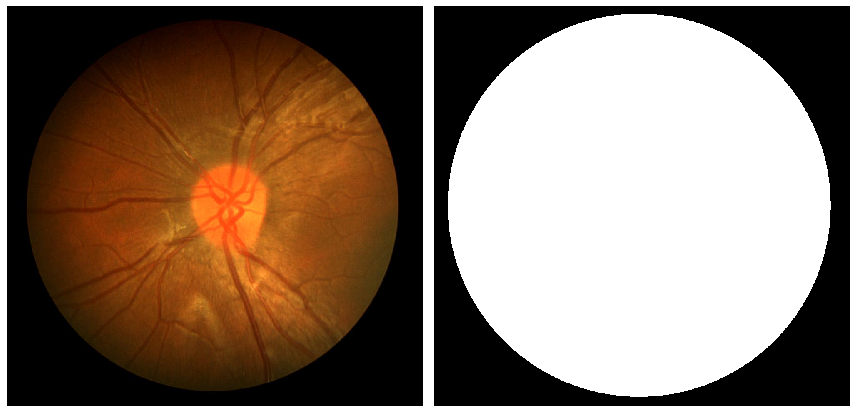

Optimization terminated successfully.
         Current function value: -957955.000000
         Iterations: 58
         Function evaluations: 133


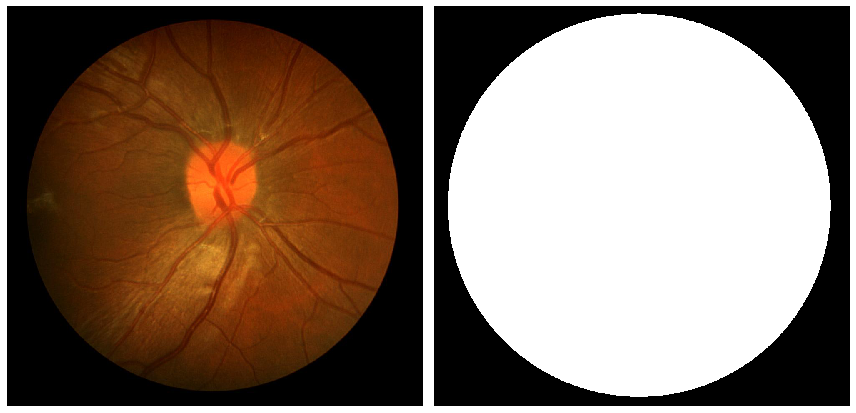

Optimization terminated successfully.
         Current function value: -957959.000000
         Iterations: 62
         Function evaluations: 135


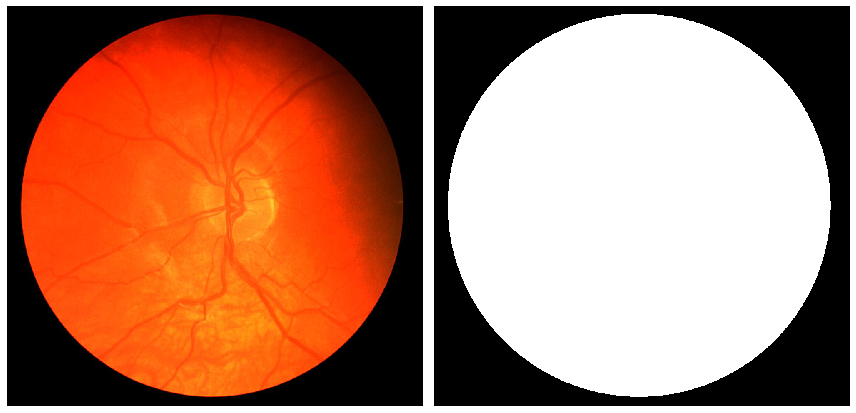

Optimization terminated successfully.
         Current function value: -957955.000000
         Iterations: 54
         Function evaluations: 130


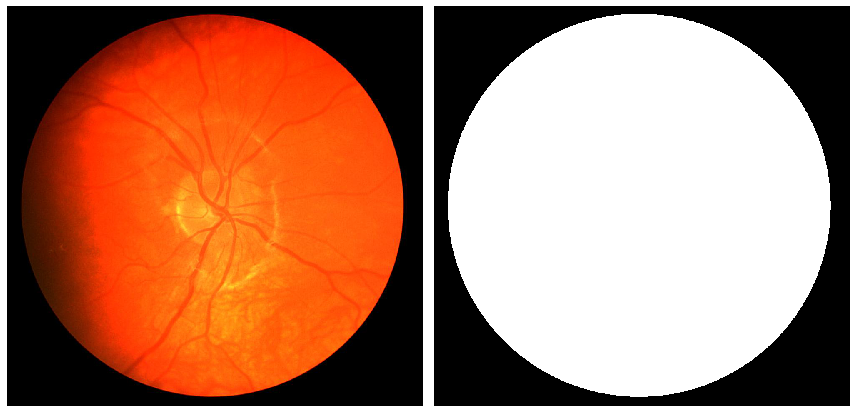

Optimization terminated successfully.
         Current function value: -957958.000000
         Iterations: 59
         Function evaluations: 125


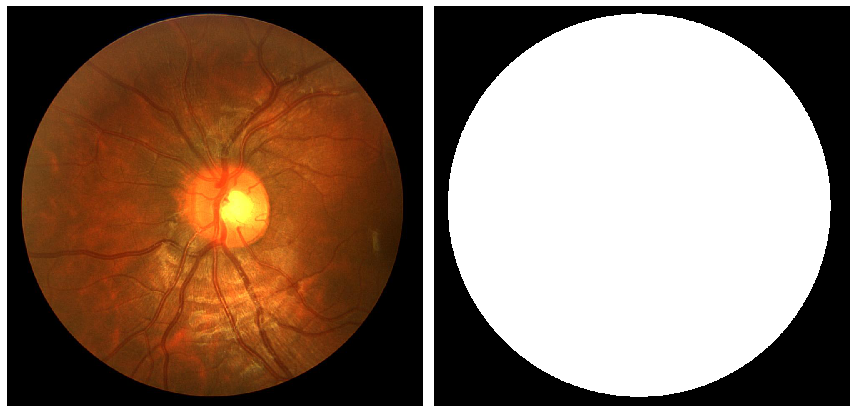

Optimization terminated successfully.
         Current function value: -957955.000000
         Iterations: 60
         Function evaluations: 134


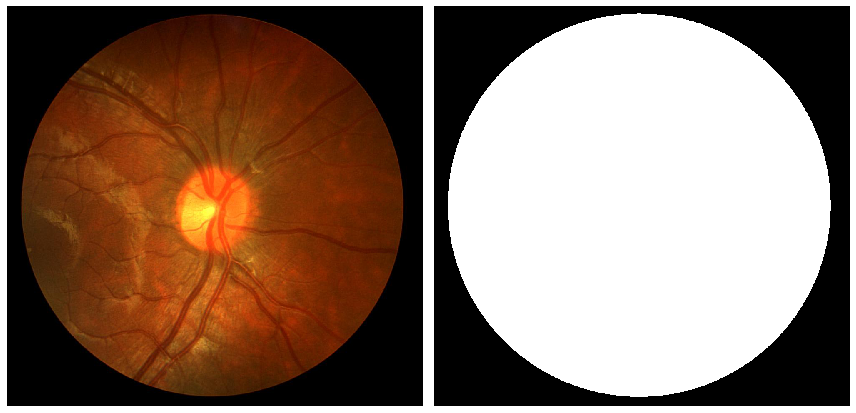

Optimization terminated successfully.
         Current function value: -957951.000000
         Iterations: 57
         Function evaluations: 127


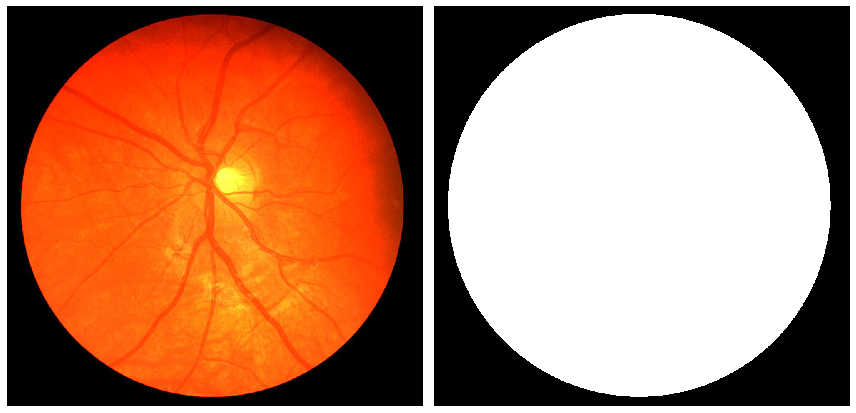

Optimization terminated successfully.
         Current function value: -957957.000000
         Iterations: 59
         Function evaluations: 131


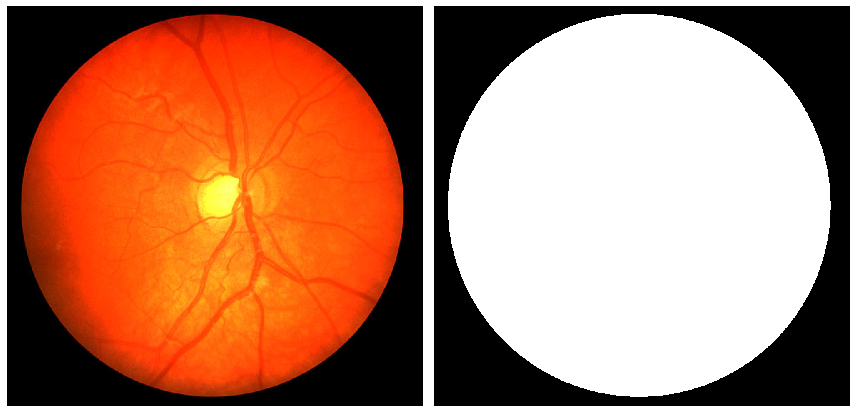

Optimization terminated successfully.
         Current function value: -957950.000000
         Iterations: 54
         Function evaluations: 122


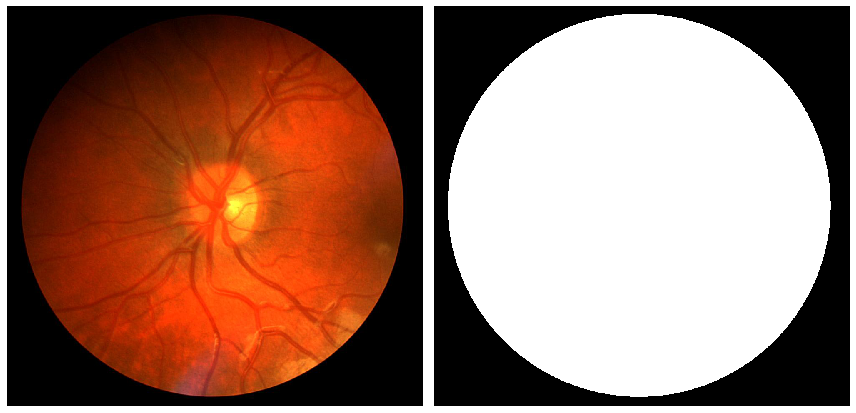

Optimization terminated successfully.
         Current function value: -957956.000000
         Iterations: 56
         Function evaluations: 121


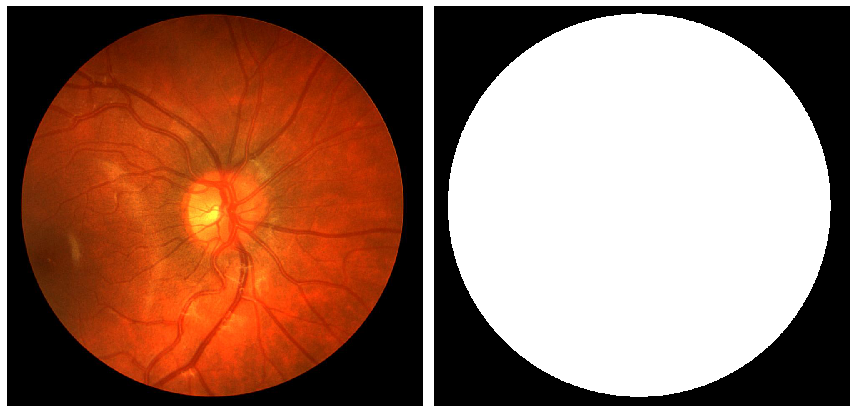

Optimization terminated successfully.
         Current function value: -957955.000000
         Iterations: 60
         Function evaluations: 130


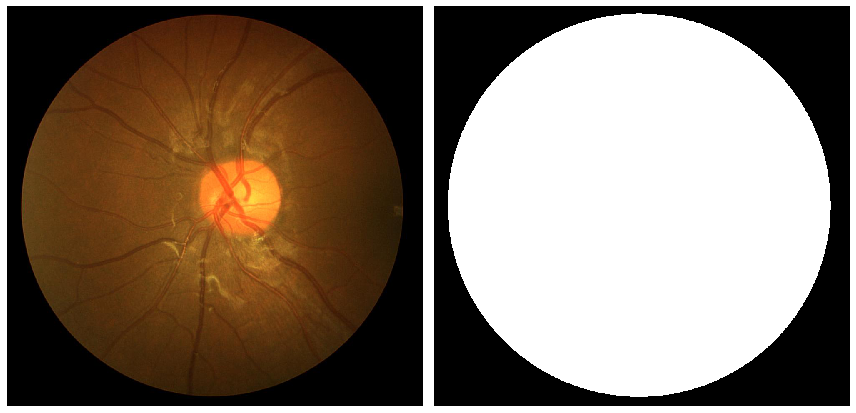

Optimization terminated successfully.
         Current function value: -957960.000000
         Iterations: 65
         Function evaluations: 141


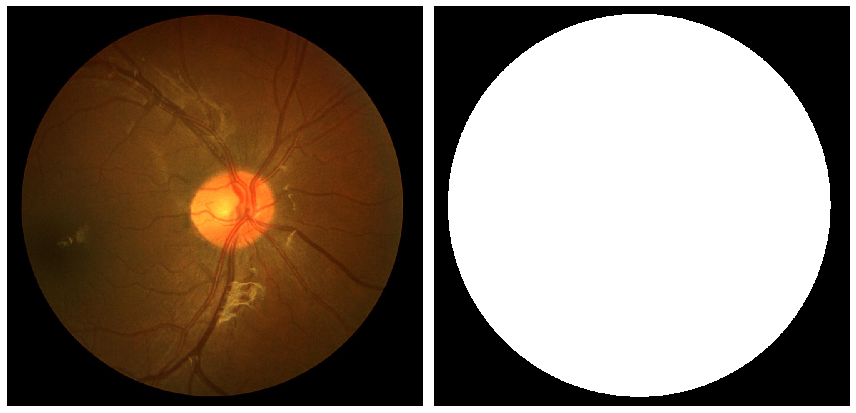

Optimization terminated successfully.
         Current function value: -957957.000000
         Iterations: 65
         Function evaluations: 129


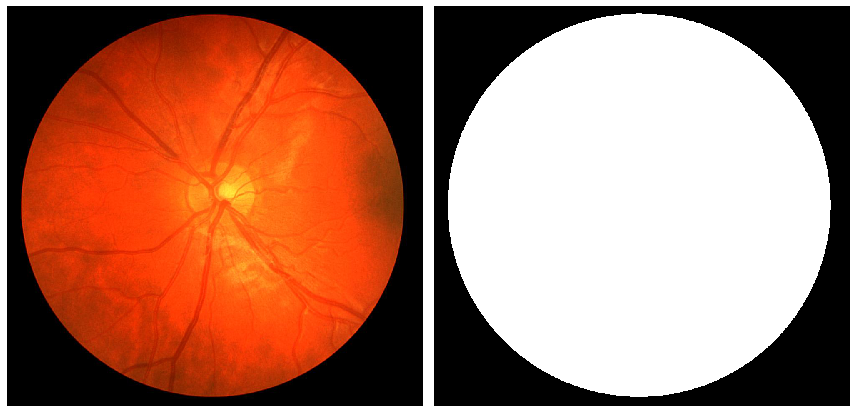

Optimization terminated successfully.
         Current function value: -957958.000000
         Iterations: 58
         Function evaluations: 129


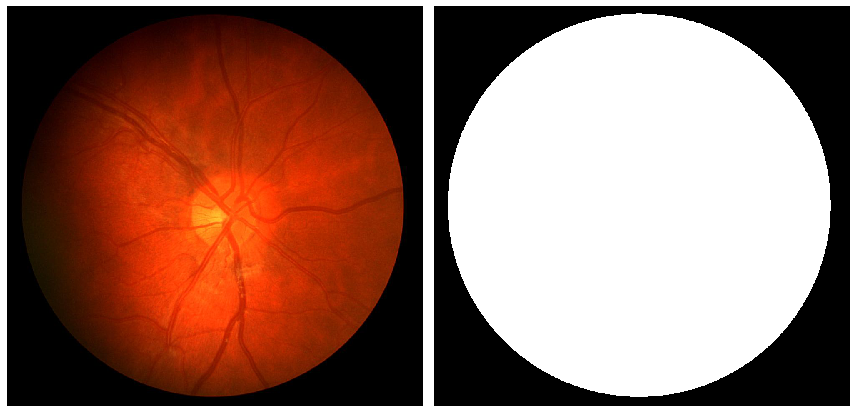

In [222]:
for i in range(len(im_list)):
    n = im_list[i]
    full_n = full_im_list[i]
    out_n = osp.join(path_masks, n)
    im = Image.open(full_n)
    fov = Image.fromarray(crop_FOV(im).astype(bool))
    fov.save(out_n)
    imshow_pair(im, fov)
    plt.show()